In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Dataset EDA

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [4]:
df.drop(columns="id",inplace=True)

In [5]:
df.shape

(188533, 12)

In [6]:
df.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [7]:
df.dtypes

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [8]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

clean_title    21419
fuel_type       5083
accident        2452
dtype: int64

In [9]:
df["brand"].nunique()

57

In [10]:
df["fuel_type"].nunique()

7

In [11]:
df["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [12]:
df.loc[(df["fuel_type"]== "–"),:]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
532,Dodge,Challenger R/T Scat Pack,2021,35000,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000
1155,Ford,Mustang GT Premium,2017,143600,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000
1307,Toyota,Land Cruiser Base,1994,138033,–,–,A/T,Green,Beige,None reported,Yes,11999
1362,Ford,Mustang EcoBoost Premium,2016,43000,–,–,A/T,Blue,Black,None reported,Yes,15500
1741,Chevrolet,Protege DX,1993,94200,–,–,A/T,Red,Gray,None reported,Yes,7599
...,...,...,...,...,...,...,...,...,...,...,...,...
187399,Mazda,MX-5 Miata Base,1993,90200,–,–,5-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,11500
187495,Nissan,Pathfinder SL,2014,87305,–,284.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Brown,Gray,At least 1 accident or damage reported,Yes,10000
187664,Mercedes-Benz,SLS AMG Base,1993,14586,–,–,A/T,Red,Silver,None reported,Yes,65000
187820,Chrysler,Pacifica Touring,2017,57300,–,–,9-Speed A/T,Blue,Black,None reported,Yes,31700


In [13]:
df.loc[(df["fuel_type"]== "–")&(df["engine"]!= "–"),:]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2138,Saturn,Sky Base,2008,125800,–,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,9950
2741,Bentley,Continental GT W12,2022,13232,–,582.0HP 6.0L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,52000
8607,Ford,Excursion XLT 4WD,2000,93000,–,310.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,28500
15550,RAM,1500 Rebel,2018,11000,–,395.0HP 5.7L 8 Cylinder Engine Gasoline/Mild E...,A/T,White,Black,None reported,Yes,105000
23676,Nissan,Juke SL,2019,46000,–,188.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,White,Gray,At least 1 accident or damage reported,Yes,59000
105015,Toyota,Tacoma TRD Pro,2018,31678,–,3.5 Liter,Automatic,Midnight Black Metallic,Graphite w/Gun Metal,None reported,NaN,40998
112813,RAM,1500 Classic Tradesman,2017,133338,–,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Ruby Flare Pearl,Black,At least 1 accident or damage reported,Yes,45999
128224,BMW,M3 Base,2008,58000,–,333.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,41500
187495,Nissan,Pathfinder SL,2014,87305,–,284.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Brown,Gray,At least 1 accident or damage reported,Yes,10000


In [14]:
df["engine"].nunique()

1117

Extracting horsepower from the engine column.

In [15]:
engine_split = df["engine"].str.split("HP",expand=True)

In [16]:
engine_split[0].unique()

array(['172.0', '252.0', '320.0', '420.0', '208.0', '333.0', '355.0',
       '2.7L V6 24V PDI DOHC Twin Turbo', '425.0', '312.0',
       'Electric Motor Electric Fuel System', '523.0', '503.0', '395.0',
       '310.0', '469.0', '5.2L V10 40V PDI DOHC', '429.0', '210.0',
       '335.0', '316.0', '381.0', '450.0', '236.0', '211.0', '220.0',
       '255.0', '518.0', '268.0', '174.0', '240.0', '248.0', '563.0',
       '241.0', '3.6L V6 24V GDI DOHC', '230.0', '430.0',
       '4.0L V8 32V GDI DOHC Twin Turbo', '835.0', '5.7L V8 16V MPFI OHV',
       '300.0', '280.0', '295.0', 'Dual Motor - Standard', '348.0',
       '560.0', '285.0', '302.0', '3.0L V6 24V GDI DOHC Twin Turbo',
       '490.0', '200.0', '416.0', '179.0',
       '3.8L V8 32V MPFI DOHC Twin Turbo',
       '3.4L V6 24V PDI DOHC Twin Turbo Hybrid', '385.0', '160.0',
       '270.0', '3.5L V6 24V PDI DOHC Twin Turbo', '350.0', '190.0',
       '181.0', '2.0L I4 16V PDI DOHC Turbo', '265.0', '345.0', '400.0',
       '261.0', '536.0',

In [17]:
engine_split[0] = engine_split[0].apply(lambda x: x if (len(x)==5)or(len(x)==4) else 0)

In [18]:
engine_split[0].unique()

array(['172.0', '252.0', '320.0', '420.0', '208.0', '333.0', '355.0', 0,
       '425.0', '312.0', '523.0', '503.0', '395.0', '310.0', '469.0',
       '429.0', '210.0', '335.0', '316.0', '381.0', '450.0', '236.0',
       '211.0', '220.0', '255.0', '518.0', '268.0', '174.0', '240.0',
       '248.0', '563.0', '241.0', '230.0', '430.0', '835.0', '300.0',
       '280.0', '295.0', '348.0', '560.0', '285.0', '302.0', '490.0',
       '200.0', '416.0', '179.0', '385.0', '160.0', '270.0', '350.0',
       '190.0', '181.0', '265.0', '345.0', '400.0', '261.0', '536.0',
       '402.0', '382.0', '180.0', '617.0', '173.0', '389.0', '318.0',
       '325.0', '365.0', '340.0', '235.0', '169.0', '710.0', '225.0',
       '366.0', '284.0', '260.0', '670.0', '480.0', '440.0', '301.0',
       '380.0', '616.0', '317.0', '435.0', '305.0', '471.0', '443.0',
       '328.0', '550.0', '201.0', '276.0', '582.0', '290.0', '362.0',
       '184.0', '120.0', '275.0', '510.0', '414.0', '375.0', '455.0',
       '520.0', '

In [19]:
engine_split[0] = engine_split[0].apply(lambda x: 0 if "L" in str(x) else x)

In [20]:
engine_split[0] = engine_split[0].str.split(".",expand=True)[0]

In [21]:
engine_split[0].fillna(0,inplace=True)

In [22]:
df["horsepower"] = engine_split[0]

Extracting engine capacity from the engine column.

In [23]:
engine_split = df["engine"].str.split("([0-9]+.[0-9]L)|([0-9]+.[0-9][0-9]L)|([0-9]+.[0-9]+ L)",expand=True,regex=True)

In [24]:
engine_split.head()

,0,1,2,3,4
0,172.0HP,1.6L,None,None,4 Cylinder Engine Gasoline Fuel
1,252.0HP,3.9L,None,None,8 Cylinder Engine Gasoline Fuel
2,320.0HP,5.3L,None,None,8 Cylinder Engine Flex Fuel Capability
3,420.0HP,5.0L,None,None,8 Cylinder Engine Gasoline Fuel
4,208.0HP,2.0L,None,None,4 Cylinder Engine Gasoline Fuel


In [25]:
import re

In [26]:
def makeLColumn(x):
    if re.search("([0-9]+.[0-9]L)",str(x[0]))!=None:
        return x[0]
    elif re.search("([0-9]+.[0-9]L)",str(x[1]))!=None:
        return x[1]
    elif (re.search("([0-9]+.[0-9]+ L)",str(x[2]))!=None)|(re.search("([0-9]+.[0-9][0-9]L)",str(x[2]))!=None):
        return x[2].replace(" L","L")
    elif re.search("([0-9]+.[0-9]+ L)",str(x[3]))!=None:
        return x[3].replace(" L","L")
    else:
        if ("Electric" in x[0])or(("Dual" in x[0]))or(("Standard" in x[0])):
            #return "Electric"       
            return "0L"
        elif "111.2Ah" in x[0]:
            #return "Electric"
            return "0L"
        elif x[0]=="–":
            #return "unknown"
            return "0L"
        return "0L"

In [27]:
engine_split[1].unique()

array(['1.6L', '3.9L', '5.3L', '5.0L', '2.0L', '3.0L', '2.7L', '3.6L',
       None, '6.2L', '4.4L', '4.0L', '4.6L', '5.2L', '3.7L', '5.7L',
       '6.7L', '3.5L', '2.8L', '5.5L', '5.4L', '6.8L', '3.8L', '2.5L',
       '3.4L', '2.4L', '3.3L', '2.3L', '3.2L', '4.7L', '1.8L', '6.0L',
       '4.8L', '5.6L', '4.3L', '4.2L', '1.5L', '6.4L', '8.3L', '6.3L',
       '2.1L', '1.4L', '4.5L', '1.3L', '2.9L', '1.7L', '6.6L', '2.2L',
       '6.1L', '7.3L', '6.5L', '7.0L', '1.0L', '5.9L', '8.1L', '5.8L',
       '1.2L', '8.4L', '8.0L', '7.4L'], dtype=object)

In [28]:
temp = pd.Series(engine_split.apply(makeLColumn,axis=1,result_type="expand"))

In [29]:
df["engine_capacity"] = temp

Extracting cylider from the engine column.

In [30]:
engine_split = df["engine"].str.split("([0-9][0-9]+.Cylinder)|(V[0-9]+.Cylinder)|([0-9]+.Cylinder)|(V[0-9])|([0-9][0-9]V)",expand=True,regex=True)

In [31]:
engine_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,172.0HP 1.6L,None,None,4 Cylinder,None,None,Engine Gasoline Fuel,None,None,None,None,None,None
1,252.0HP 3.9L,None,None,8 Cylinder,None,None,Engine Gasoline Fuel,None,None,None,None,None,None
2,320.0HP 5.3L,None,None,8 Cylinder,None,None,Engine Flex Fuel Capability,None,None,None,None,None,None
3,420.0HP 5.0L,None,None,8 Cylinder,None,None,Engine Gasoline Fuel,None,None,None,None,None,None
4,208.0HP 2.0L,None,None,4 Cylinder,None,None,Engine Gasoline Fuel,None,None,None,None,None,None


In [32]:
engine_split[engine_split[0].apply(lambda x: "Cylinder" in x)].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12


In [33]:
engine_split[1].unique()

array([None, '10 Cylinder', '12 Cylinder'], dtype=object)

In [34]:
engine_split[2].unique()

array([None, 'V6 Cylinder'], dtype=object)

In [35]:
engine_split[3].unique()

array(['4 Cylinder', '8 Cylinder', None, '6 Cylinder', '5 Cylinder',
       '3 Cylinder'], dtype=object)

In [36]:
engine_split[4].unique()

array([None, 'V6', 'V1', 'V8'], dtype=object)

In [37]:
engine_split[5].unique()

array([None, '16V', '24V', '12V', '48V', '64V', '97V'], dtype=object)

In [38]:
engine_split[6].unique()

array([' Engine Gasoline Fuel', ' Engine Flex Fuel Capability', ' ', None,
       ' Engine Gasoline/Mild Electric Hybrid', '0 ',
       ' Engine Diesel Fuel', ' PDI DOHC Turbo', ' GDI DOHC',
       ' Engine Plug-In Electric/Gas', ' GDI DOHC Turbo',
       ' GDI DOHC Twin Turbo', ' Engine Gas/Electric Hybrid',
       ' MPFI DOHC', ' GDI SOHC Turbo', '2 ', ' DDI OHV Turbo Diesel',
       ' GDI DOHC Turbo Hybrid', ' DDI DOHC Turbo Diesel', ' PDI DOHC',
       '', ' GDI DOHC Turbo Flexible Fuel', ' GDI DOHC Hybrid',
       ' SOHC I-VTEC ', ' PDI DOHC Twin Turbo', ' Engine', ' MPFI SOHC',
       ' MPFI DOHC Turbo', ' MPFI DOHC Hybrid', ' PDI DOHC Hybrid',
       ' GDI DOHC Flexible Fuel', ')'], dtype=object)

In [39]:
engine_split[10].unique()

array([None, 'V6'], dtype=object)

In [40]:
engine_split[11].unique()

array([None, '24V', '40V', '32V', '16V', '48V', '18V', '12V'],
      dtype=object)

In [41]:
def makeCylinderColumn(x):
    if re.search("([0-9][0-9]+.Cylinder)",str(x[1]))!=None:
        return x[1]
    elif re.search("(V[0-9]+.Cylinder)",str(x[2]))!=None:
        return x[2].replace("V","")
    elif re.search("([0-9]+.Cylinder)",str(x[3]))!=None:
        return x[3]
    elif re.search("(V[0-9])",str(x[4]))!=None:
        return x[4].replace("V","")+" "+"Cylinder"
    elif re.search("(V[0-9])",str(x[5]))!=None:
        return x[5].replace("V","")+" "+"Cylinder"
    elif re.search("(V[0-9])",str(x[10]))!=None:
        return x[10].replace("V","")+" "+"Cylinder"
    elif re.search("(V[0-9])",str(x[11]))!=None:
        return x[11].replace("V","")+" "+"Cylinder"
    else:
        if x[0]=="–":
            #return "unknown"
            return "0 Cylinder"
        else:
            #return "unknown"
            return "0 Cylinder"

In [42]:
temp = pd.Series(engine_split.apply(makeCylinderColumn,axis=1,result_type="expand"))

In [43]:
df["engine_cylinders"] = temp

Filling missing fuel type by using the same brand and model that has fuel type already. 

In [44]:
df["fuel_type"] = df.groupby(["brand","model"])["fuel_type"].ffill().bfill()

In [45]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

clean_title    21419
accident        2452
dtype: int64

Fixing different spelling for the same type of transmission. </br>

In [46]:
df["transmission"].nunique()

52

In [47]:
df["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [48]:
df["transmission"] = df["transmission"].str.lower()

In [49]:
df["transmission"] = df["transmission"].str.replace("automatic","a/t")
df["transmission"] = df["transmission"].str.replace("manual","m/t")
df["transmission"] = df["transmission"].str.replace("mt","m/t")
df["transmission"] = df["transmission"].str.replace("at","a/t")

In [50]:
df["transmission"].value_counts()

transmission
a/t                                             60595
8-speed a/t                                     29096
6-speed a/t                                     20843
transmission w/dual shift mode                  19255
6-speed m/t                                     12209
7-speed a/t                                     11302
10-speed a/t                                    11208
9-speed a/t                                      6191
5-speed a/t                                      3376
4-speed a/t                                      2594
5-speed m/t                                      2409
1-speed a/t                                      2234
cvt transmission                                 1990
m/t                                              1206
7-speed a/t with auto-shift                      1172
a/t cvt                                           829
8-speed a/t with auto-shift                       549
7-speed m/t                                       506
transmission ov

Filling missing values for accident column.

In [51]:
df["accident"].nunique()

2

In [52]:
df["accident"].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [53]:
df["accident"].fillna("missing",inplace=True)

Filling missing values for clean_title column.

In [54]:
df["clean_title"].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

In [55]:
df["clean_title"] = df["clean_title"].fillna("No")

In [56]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_capacity,engine_cylinders
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,a/t,Yellow,Gray,None reported,Yes,4200,172,1.6L,4 Cylinder
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252,3.9L,8 Cylinder
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,a/t,Blue,Gray,None reported,Yes,13900,320,5.3L,8 Cylinder
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,transmission w/dual shift mode,Black,Black,None reported,Yes,45000,420,5.0L,8 Cylinder
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-speed a/t,Black,Beige,None reported,Yes,97500,208,2.0L,4 Cylinder


Removing L and Cylinders from appropriate columns and converting it to more suitable data types

In [57]:
df["engine_capacity"] = df["engine_capacity"].str.split("L",expand=True)[0].astype("float64")

In [58]:
df["engine_cylinders"] = df["engine_cylinders"].str.split(" ",expand=True)[0].astype("int64")

Making new features out of existing ones

In [59]:
df["car_age"] = 2024 - df["model_year"]

In [60]:
df["horsepower"] = df["horsepower"].astype("int64")

In [61]:
def checkDivide(x,y):
    0.0 if (x==0)|(y==0) else x/y

In [62]:
df["milage_per_year"] = df["milage"].divide(df["car_age"]).replace(np.inf,0.0)

In [63]:
df["power_ratio"] = df["horsepower"].divide(df["engine_capacity"]).replace(np.inf,0.0)
df["power_ratio"].fillna(0.0,inplace=True)

Converting all exterior colors to only 12 base colors which are most frequent

In [64]:
df["ext_col"].nunique()

319

In [65]:
df["ext_col"].value_counts()[0:12]

ext_col
Black     48658
White     43815
Gray      25293
Silver    16995
Blue      14555
Red        9901
Green      2698
Gold       1668
Brown      1162
Orange     1139
Beige      1087
Yellow      978
Name: count, dtype: int64

In [66]:
basic_colors = df["ext_col"].value_counts()[0:12].index.values

In [67]:
basic_colors

array(['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Gold',
       'Brown', 'Orange', 'Beige', 'Yellow'], dtype=object)

In [68]:
def colorUpdate(x,colors=basic_colors):
    for color in colors:
        if color.lower() in x.lower():
            return color

In [69]:
df["ext_col"] = df["ext_col"].apply(colorUpdate)

In [70]:
df["ext_col"].isna().sum()

4522

In [71]:
df["ext_col"].fillna("Other",inplace=True)

Converting all interior colors to only 11 base colors which are most frequent

In [72]:
df["int_col"].nunique()

156

In [73]:
df["int_col"].value_counts()[0:11]

int_col
Black        107674
Beige         24495
Gray          21204
Brown          5810
Red            5145
White          4743
–              4527
Jet Black      2398
Ebony          1833
Orange          932
Blue            743
Name: count, dtype: int64

In [74]:
basic_colors = df["int_col"].value_counts()[0:11].index.values

In [75]:
basic_colors

array(['Black', 'Beige', 'Gray', 'Brown', 'Red', 'White', '–',
       'Jet Black', 'Ebony', 'Orange', 'Blue'], dtype=object)

In [76]:
def colorUpdate(x,colors=basic_colors):
    for color in colors:
        if color.lower() in x.lower():
            return color

In [77]:
df["int_col"] = df["int_col"].apply(colorUpdate)

In [78]:
df["int_col"].value_counts()

int_col
Black     112677
Beige      24917
Gray       21500
Brown       6017
Red         5507
White       4794
–           4527
Ebony       2094
Orange       969
Blue         833
Name: count, dtype: int64

In [79]:
df["int_col"].isna().sum()

4698

In [80]:
df["int_col"].fillna("Othre",inplace=True)

Making brand ranking column based on their average price

In [81]:
plotting = df.groupby("brand")["price"].mean().reset_index().sort_values("price",ascending=False)

In [82]:
plotting.describe()

,price
count,57.000000
mean,48869.116009
std,36030.718134
min,14652.416667
25%,28095.000000
50%,34801.090131
75%,53204.880000
max,169600.000000


<Axes: xlabel='price', ylabel='brand'>

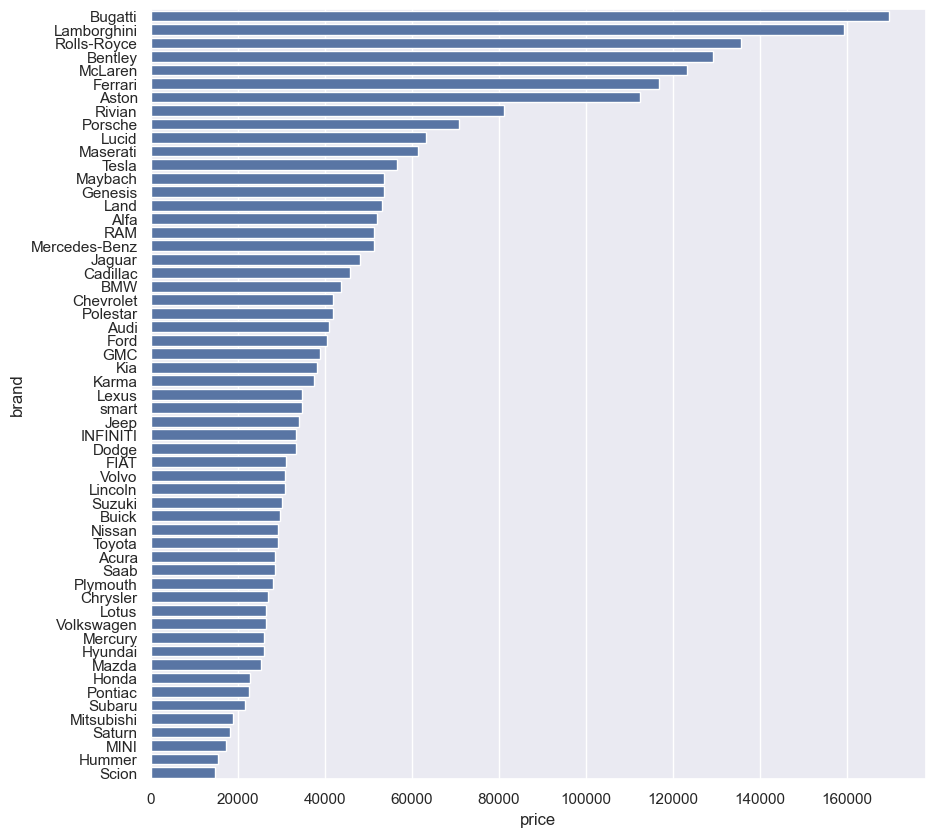

In [83]:
sns.set_theme(font_scale=1)
plt.figure(figsize=(10,10))
sns.barplot(data=plotting, y="brand", x="price")

In [84]:
luxury_brand = plotting.iloc[:7,0].values
premium_brand = plotting.iloc[7:21,0].values
mass_market_brand = plotting.iloc[21:49,0].values
budget_brand = plotting.iloc[49:,0].values

In [85]:
def brandRank(x):
    if x in luxury_brand:
        return "luxury"
    elif x in premium_brand:
        return "premium"
    elif x in mass_market_brand:
        return "mass_market"
    elif x in budget_brand:
        return "budget"
    else:
        return "other"

In [86]:
df["brand_category"] = df["brand"].apply(brandRank)

In [87]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_capacity,engine_cylinders,car_age,milage_per_year,power_ratio,brand_category
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,a/t,Yellow,Gray,None reported,Yes,4200,172,1.6,4,17,12529.411765,107.500000,budget
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252,3.9,8,22,6511.363636,64.615385,mass_market
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,a/t,Blue,Gray,None reported,Yes,13900,320,5.3,8,22,6215.045455,60.377358,mass_market
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,transmission w/dual shift mode,Black,Black,None reported,Yes,45000,420,5.0,8,7,2785.714286,84.000000,premium
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-speed a/t,Black,Beige,None reported,Yes,97500,208,2.0,4,3,2462.666667,104.000000,premium


Removing unnecessary columns and changing order for easier interpretation

In [88]:
df.drop(columns=["model", "model_year","engine"],inplace=True)

In [89]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_capacity,engine_cylinders,car_age,milage_per_year,power_ratio,brand_category
0,MINI,213000,Gasoline,a/t,Yellow,Gray,None reported,Yes,4200,172,1.6,4,17,12529.411765,107.500000,budget
1,Lincoln,143250,Gasoline,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252,3.9,8,22,6511.363636,64.615385,mass_market
2,Chevrolet,136731,E85 Flex Fuel,a/t,Blue,Gray,None reported,Yes,13900,320,5.3,8,22,6215.045455,60.377358,mass_market
3,Genesis,19500,Gasoline,transmission w/dual shift mode,Black,Black,None reported,Yes,45000,420,5.0,8,7,2785.714286,84.000000,premium
4,Mercedes-Benz,7388,Gasoline,7-speed a/t,Black,Beige,None reported,Yes,97500,208,2.0,4,3,2462.666667,104.000000,premium


In [90]:
column_names = list(df.columns.values)
column_names_arr = column_names[:8] + column_names[-7:]
column_names_arr.append(column_names[-8])
column_names_arr

['brand',
 'milage',
 'fuel_type',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'horsepower',
 'engine_capacity',
 'engine_cylinders',
 'car_age',
 'milage_per_year',
 'power_ratio',
 'brand_category',
 'price']

In [91]:
df = df.loc[:,column_names_arr]

In [92]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_capacity,engine_cylinders,car_age,milage_per_year,power_ratio,brand_category,price
0,MINI,213000,Gasoline,a/t,Yellow,Gray,None reported,Yes,172,1.6,4,17,12529.411765,107.500000,budget,4200
1,Lincoln,143250,Gasoline,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,252,3.9,8,22,6511.363636,64.615385,mass_market,4999
2,Chevrolet,136731,E85 Flex Fuel,a/t,Blue,Gray,None reported,Yes,320,5.3,8,22,6215.045455,60.377358,mass_market,13900
3,Genesis,19500,Gasoline,transmission w/dual shift mode,Black,Black,None reported,Yes,420,5.0,8,7,2785.714286,84.000000,premium,45000
4,Mercedes-Benz,7388,Gasoline,7-speed a/t,Black,Beige,None reported,Yes,208,2.0,4,3,2462.666667,104.000000,premium,97500


## Preparing data for model prediciton

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import mean_squared_error

In [94]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(188533, 15)
(188533,)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [96]:
category_columns = X_train.select_dtypes(["object"]).columns.values
category_columns

array(['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title', 'brand_category'], dtype=object)

In [97]:
numeric_columns = X_train.select_dtypes(["int64","float64"]).columns.values
numeric_columns

array(['milage', 'horsepower', 'engine_capacity', 'engine_cylinders',
       'car_age', 'milage_per_year', 'power_ratio'], dtype=object)

In [98]:
numeric_pipeline = Pipeline(steps=[
    ("pwr",PowerTransformer(method="yeo-johnson")),
    #("std",StandardScaler())
])

In [99]:
category_pipeline = Pipeline(steps=[
    ("onehot",OneHotEncoder(handle_unknown='ignore')),
    #("kbest",SelectKBest(chi2,k=200))
])

In [100]:
preprocess = ColumnTransformer(transformers=[
    ("num",numeric_pipeline,numeric_columns),
    ("cat",category_pipeline,category_columns)
],remainder="passthrough",sparse_threshold=0)

## Making models

In [101]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor,  AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [102]:
used_models = [CatBoostRegressor(verbose=False),LGBMRegressor(verbose=0),XGBRegressor(),LinearRegression(),HistGradientBoostingRegressor()]

names_models = ["Catboost", "LGBM","XGboost","Linear regression","Histboost"]

df_base_models = pd.DataFrame(columns=["Model","Train RMSE","Test RMSE"])

In [103]:
for name,model in zip(names_models,used_models):

    pipeline_base_models = Pipeline(steps=[
    ("prep",preprocess),
    (name,model)
    ])

    result = cross_val_score(pipeline_base_models, X_train, y_train, cv=5,scoring="neg_mean_squared_error",n_jobs=-1)

    pipeline_base_models.fit(X_train,y_train)

    y_hat = pipeline_base_models.predict(X_test)

    df_base_models.loc[len(df_base_models)] = [name,round(np.sqrt(abs(result).mean()),5),round(np.sqrt(mean_squared_error(y_test,y_hat)),5)]

df_base_models.sort_values("Test RMSE")  


,Model,Train RMSE,Test RMSE
4,Histboost,7.386338e+04,69188.14950
1,LGBM,7.399333e+04,69237.02419
0,Catboost,7.484543e+04,69595.50554
3,Linear regression,8.784533e+13,69721.85901
2,XGboost,7.686496e+04,70918.43149


### Blending models

In [104]:
meta_x, meta_y, hist_hat, lgbm_hat ,cat_hat = pd.DataFrame(), pd.Series(), list(), list(), list()

In [105]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

In [106]:
pipeline_cat = Pipeline(steps=[
    ("prepro",preprocess),
    ("cat",CatBoostRegressor(verbose=False))
])
pipeline_hist = Pipeline(steps=[
    ("prepro",preprocess),
    ("hist",HistGradientBoostingRegressor())
])
pipeline_lgbm = Pipeline(steps=[
    ("prepro",preprocess),
    ("lgbm",LGBMRegressor(verbose=0))
])

In [107]:
for train_ix, test_ix in skf.split(X_train,y_train):
    train_x, test_x = X_train.iloc[train_ix],X_train.iloc[test_ix] 
    train_y, test_y = y_train.iloc[train_ix],y_train.iloc[test_ix]

    meta_x = pd.concat([meta_x,test_x],axis=0)
    meta_y = pd.concat([meta_y,test_y],axis=0)

    pipeline_cat.fit(train_x,train_y)
    cat_hat.extend(pipeline_cat.predict(test_x))

    pipeline_hist.fit(train_x,train_y)
    hist_hat.extend(pipeline_hist.predict(test_x))

    pipeline_lgbm.fit(train_x,train_y)
    lgbm_hat.extend(pipeline_lgbm.predict(test_x))


In [108]:
pipeline_cat = Pipeline(steps=[
    ("prepro",preprocess),
    ("cat",CatBoostRegressor(verbose=False))
])
pipeline_hist = Pipeline(steps=[
    ("prepro",preprocess),
    ("hist",HistGradientBoostingRegressor())
])
pipeline_lgbm = Pipeline(steps=[
    ("prepro",preprocess),
    ("lgbm",LGBMRegressor(verbose=0))
])

In [109]:
pipeline_cat.fit(X_train,y_train)
pipeline_hist.fit(X_train,y_train)
pipeline_lgbm.fit(X_train,y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('pwr',
                                                                   PowerTransformer())]),
                                                  array(['milage', 'horsepower', 'engine_capacity', 'engine_cylinders',
       'car_age', 'milage_per_year', 'power_ratio'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title', 'brand_category'], dtype=object))])),
                ('lgbm', LGBMRegressor(verbose=0))])

In [110]:
test_cat_hat = pipeline_cat.predict(X_test)
test_hist_hat = pipeline_hist.predict(X_test)
test_lgbm_hat = pipeline_lgbm.predict(X_test)

In [111]:
print(f"Catboost test RMSE: {np.sqrt(mean_squared_error(test_cat_hat,y_test)):.5f}")
print(f"Histboost test RMSE: {np.sqrt(mean_squared_error(test_hist_hat,y_test)):.5f}")
print(f"LGBM test RMSE: {np.sqrt(mean_squared_error(test_lgbm_hat,y_test)):.5f}")

Catboost test RMSE: 69595.50554
Histboost test RMSE: 69168.20777
LGBM test RMSE: 69237.02419


In [112]:
meta_train = meta_x.copy()
meta_train["cathat"], meta_train["histhat"], meta_train["lgbmhat"] = cat_hat, hist_hat ,lgbm_hat

In [113]:
pipeline_meta = Pipeline(steps=[
    ("prepro",preprocess),
    ("meta",Lasso())
])

In [114]:
pipeline_meta.fit(meta_train,meta_y)

Pipeline(steps=[('prepro',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('pwr',
                                                                   PowerTransformer())]),
                                                  array(['milage', 'horsepower', 'engine_capacity', 'engine_cylinders',
       'car_age', 'milage_per_year', 'power_ratio'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title', 'brand_category'], dtype=object))])),
                ('meta', Lasso())])

In [115]:
meta_test = X_test.copy()
meta_test["cathat"], meta_test["histhat"], meta_test["lgbmhat"] = test_cat_hat, test_hist_hat ,test_lgbm_hat

In [116]:
meta_hat = pipeline_meta.predict(meta_test)

In [117]:
print(f"Meta model test RMSE: {np.sqrt(mean_squared_error(meta_hat,y_test)):.5f}")

Meta model test RMSE: 69047.95144
